In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

In [2]:
# Load dataset
boston = pd.read_csv('HousingData.csv')
X = boston.drop(columns=['MEDV'])
y = boston['MEDV']

In [3]:
# Check for null values and fill/remove them
if X.isnull().sum().sum() > 0 or y.isnull().sum() > 0:
    print("Dataset contains null values, filling them with the mean...")
    X.fillna(X.mean(), inplace=True)
    y.fillna(y.mean(), inplace=True)

Dataset contains null values, filling them with the mean...


In [4]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Feature scaling
scaler_X = StandardScaler()
X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)

In [6]:
# Normalize target variable (manual scaling to maintain interpretability)
y_train_mean = y_train.mean()
y_train_std = y_train.std()
y_train = (y_train - y_train_mean) / y_train_std
y_test = (y_test - y_train_mean) / y_train_std  # Normalize test data based on training mean/std

In [7]:
# Build the model (simplified architecture)
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer for regression
])

C:\Users\mital\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
# Compile the model
optimizer = Adam(learning_rate=0.01)  # Increased learning rate for faster convergence
model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

In [9]:
# Early stopping
early_stopping = EarlyStopping(patience=10, restore_best_weights=True, monitor='val_loss')

In [10]:
# Train the model
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=16,
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.7193 - mae: 0.6135 - val_loss: 0.2530 - val_mae: 0.3339
Epoch 2/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2520 - mae: 0.3527 - val_loss: 0.1681 - val_mae: 0.2640
Epoch 3/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1853 - mae: 0.2995 - val_loss: 0.1605 - val_mae: 0.2610
Epoch 4/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1165 - mae: 0.2546 - val_loss: 0.1491 - val_mae: 0.2521
Epoch 5/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1302 - mae: 0.2779 - val_loss: 0.1159 - val_mae: 0.2206
Epoch 6/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0874 - mae: 0.2265 - val_loss: 0.1413 - val_mae: 0.2731
Epoch 7/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1028 - mae: 0.2344 - val_loss: 0.1006 - val_mae: 0.2325
Epoch 8/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1140 - mae: 0.2380 - val_loss: 0.2823 - val_mae: 0.3259
Epoch 9/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.18

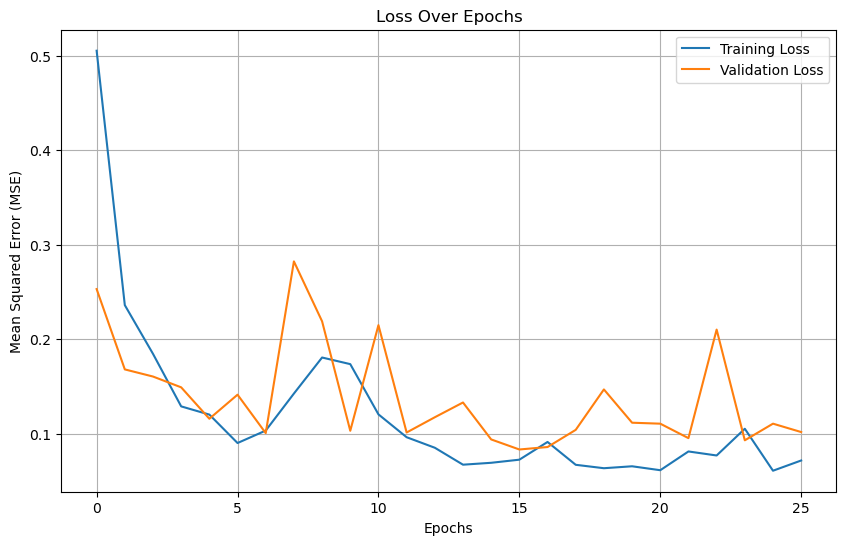

In [11]:
import matplotlib.pyplot as plt

# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error (MSE)')
plt.legend()
plt.grid()
plt.show()

In [12]:
# Evaluate the model
loss, mae = model.evaluate(X_test, y_test, verbose=0)
print(f"Mean Absolute Error on Test Data: {mae:.2f}")

Mean Absolute Error on Test Data: 0.25


In [13]:
# Make predictions and denormalize
predictions_normalized = model.predict(X_test)
predictions = predictions_normalized * y_train_std + y_train_mean  # Denormalize predictions
y_test_original = y_test * y_train_std + y_train_mean              # Denormalize true values

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


In [14]:
# Print example predictions
print("Sample Predictions vs Actual Values:")
for i in range(5):
    print(f"Predicted: {predictions[i][0]:.2f}, Actual: {y_test_original.iloc[i]:.2f}")

Sample Predictions vs Actual Values:
Predicted: 25.09, Actual: 23.60
Predicted: 29.06, Actual: 32.40
Predicted: 16.17, Actual: 13.60
Predicted: 22.72, Actual: 22.80
Predicted: 16.06, Actual: 16.10


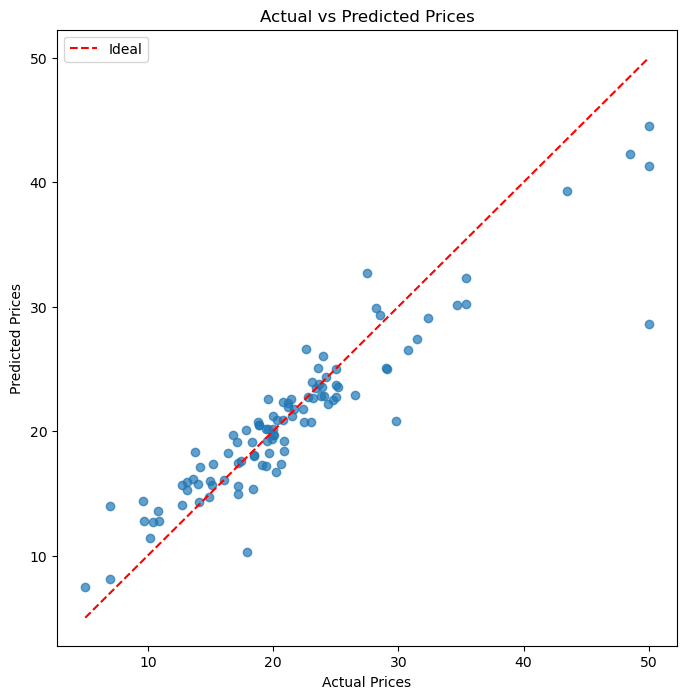

In [15]:
# Scatter plot
plt.figure(figsize=(8, 8))
plt.scatter(y_test_original, predictions, alpha=0.7)
plt.plot([y_test_original.min(), y_test_original.max()],
         [y_test_original.min(), y_test_original.max()], 'r--', label='Ideal')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.legend()
plt.show()